# Correlation

In [0]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# Data
df = pd.read_csv("https://raw.githubusercontent.com/preetsc27/Visual-Vocabulary/master/USInflation.csv")
ndf = df.iloc[85:106]
Wdf = pd.read_csv("https://raw.githubusercontent.com/preetsc27/Visual-Vocabulary/master/weatherNYCcentralpark_2016.csv")
df1 = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave
0,1914,2.0,1.0,1.0,0.0,2.1,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0
1,1915,1.0,1.0,0.0,2.0,2.0,2.0,1.0,-1.0,-1.0,1.0,1.0,2.0,1.0
2,1916,3.0,4.0,6.1,6.0,5.9,6.9,6.9,7.9,9.9,10.8,11.7,12.6,7.9
3,1917,12.5,15.4,14.3,18.9,19.6,20.4,18.5,19.3,19.8,19.5,17.4,18.1,17.4
4,1918,19.7,17.5,16.7,12.7,13.3,13.1,18.0,18.5,18.0,18.5,20.7,20.4,18.0


### Scatter Plot

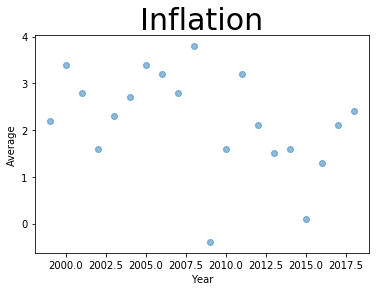

In [3]:
plt.scatter(ndf.Year, ndf.Ave, alpha=0.5)
plt.title('Inflation',fontsize=30)
plt.xlabel('Year')
plt.ylabel('Average')
plt.show()

### Line + Column

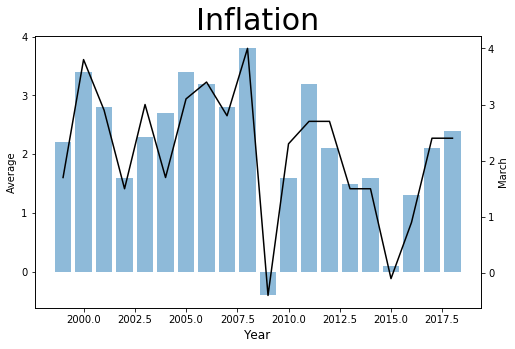

In [4]:
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(ndf.Year, ndf.Ave, alpha=0.5)
axes2 = ax.twinx()
axes2.plot(ndf.Year, ndf.Mar, color='k', label='Sine')
axes2.set_ylabel('March')
plt.title('Inflation',fontsize=30)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel('Average')
plt.show()

### Connected Scatterplot

Text(0, 0.5, 'Average')

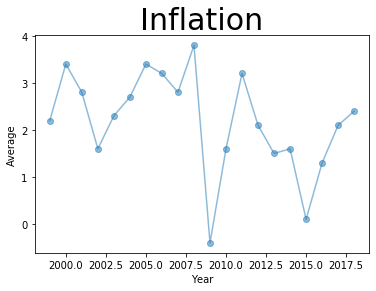

In [5]:
plt.plot( ndf.Year, ndf.Ave, alpha=0.5, linestyle='-', marker='o')
plt.title('Inflation',fontsize=30)
plt.xlabel('Year')
plt.ylabel('Average')

### Bubble plot

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0, 0.5, 'Average')

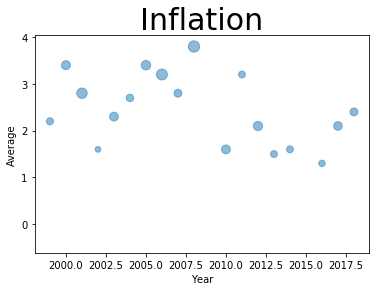

In [6]:
plt.scatter(ndf.Year, ndf.Ave,s=ndf.Jan * 30, alpha=0.5)
plt.title('Inflation',fontsize=30)
plt.xlabel('Year')
plt.ylabel('Average')

### Heatmap

In [7]:
df1.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout


In [8]:
df2 = ndf.melt(id_vars=['Year'], 
        var_name="Months", 
        value_name="Inflation")
df2.head()

,Year,Months,Inflation
0,1999,Jan,1.7
1,2000,Jan,2.7
2,2001,Jan,3.7
3,2002,Jan,1.1
4,2003,Jan,2.6


Text(0.5, 1, 'Inflation Heatmap')

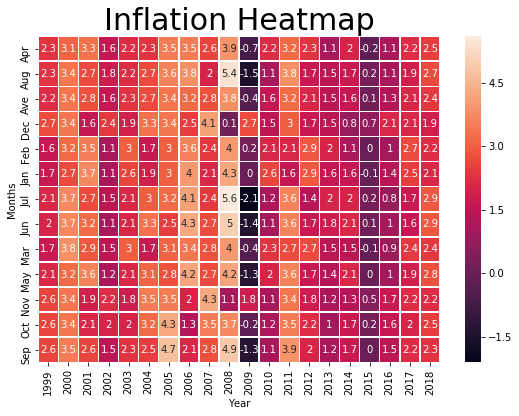

In [9]:
inflation = df2.pivot("Months", "Year", "Inflation")

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(inflation, annot=True, linewidths=.5, ax=ax)
plt.title('Inflation Heatmap',fontsize=30)

# Deviation

### Diverging bar

In [10]:
def split_date(date):
  s1 = d.split("/")
  if len(s1) == 1:
    s1 = d.split("-")
  return s1
x = Wdf.loc[:, ['date', 'maximum_temperature']]
out = []
for i, row in x.iterrows():
  d = row['date']
  s1 = split_date(d)
  month = s1[1]
  if month != "1":
    continue
  day = s1[0]
  max_avg = int(row["maximum_temperature"])
  cnt = 1
  for a, row2 in x.iterrows():
    s2 = split_date(row2["date"])
    if s2[1] == day:
      cnt += 1
      max_avg += int(row2["maximum_temperature"])
  max_avg = int(max_avg / cnt)
  # max_avg = math.ceil(max_avg)
  data = {"day": int(day), "max_avg": max_avg}
  out.append(data)

out = pd.DataFrame(out)
out.head()
out = out.sort_values("day")
out.head()

,day,max_avg
0,1,64
1,2,40
2,3,45
3,4,36
4,5,29


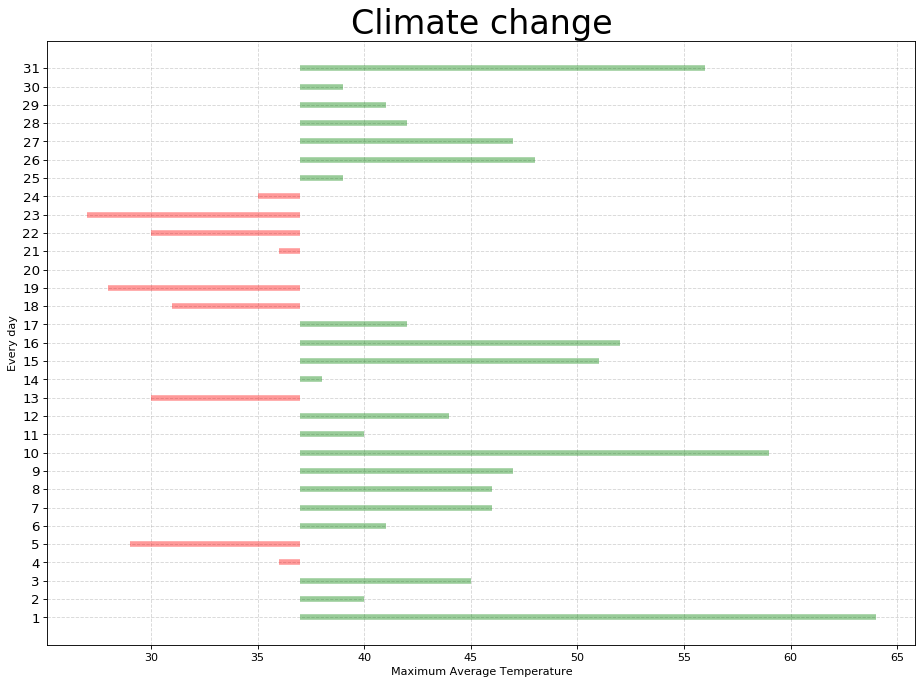

In [11]:

out['colors'] = ['red' if x < 37 else 'green' for x in out['max_avg']]
out.sort_values('day', inplace=True)

# Draw plot
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=out.index, xmin=37, xmax=out.max_avg, color=out.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='Every day', xlabel='Maximum Average Temperature')
plt.yticks(out.index, out.day, fontsize=12)
plt.title('Temperature in NYC', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.title('Climate change',fontsize=30)
plt.show()

### Diverging stacked plot

In [12]:
o_sat_data = pd.read_csv("https://raw.githubusercontent.com/preetsc27/Visual-Vocabulary/master/uni_sat_scores.csv")
sat_data = o_sat_data[:5]
sat_data.columns
sat_data = sat_data[['School Name', 'Average Score (SAT Math)', 'Average Score (SAT Reading)', 'Average Score (SAT Writing)']]
sat_data.shape

(5, 4)

In [0]:
schools = sat_data.iloc[:, 0]
maths = sat_data.iloc[:, 1]
reading = sat_data.iloc[:, 2]
writing = sat_data.iloc[:, 3]
indx = np.arange(len(sat_data))

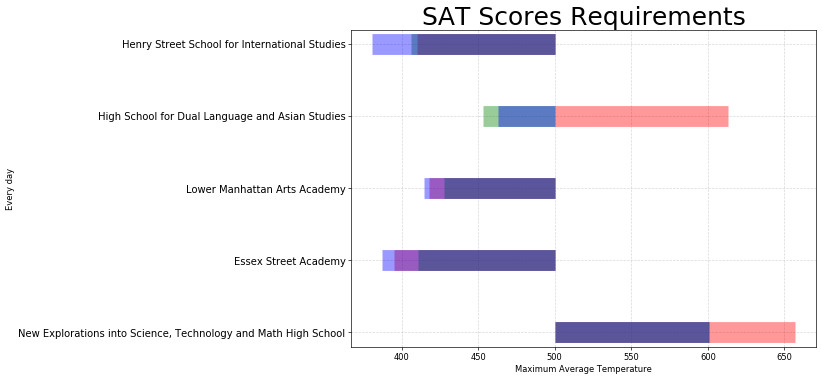

In [14]:
# Draw plot
plt.figure(figsize=(10,7), dpi= 60)
plt.hlines(y=sat_data.index, xmin=500, xmax=maths, color="red", alpha=0.4, linewidth=25)
plt.hlines(y=sat_data.index, xmin=500, xmax=reading, color="green", alpha=0.4, linewidth=25)
plt.hlines(y=sat_data.index, xmin=500, xmax=writing, color="blue", alpha=0.4, linewidth=25)

# Decorations
plt.gca().set(ylabel='Every day', xlabel='Maximum Average Temperature')
plt.yticks(sat_data.index, schools, fontsize=12)
plt.title('SAT Score', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.title('SAT Scores Requirements',fontsize=30)
plt.show()

## Spine Chart

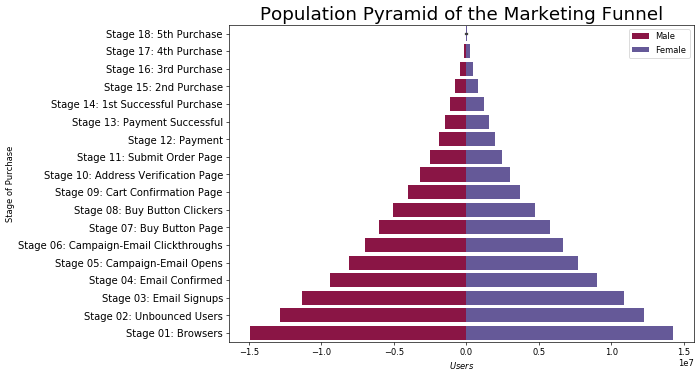

In [15]:
# Read data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/email_campaign_funnel.csv")

# Draw Plot
plt.figure(figsize=(10,7), dpi= 60)
group_col = 'Gender'
# getting the stages of the user in reverse order
order_of_bars = df.Stage.unique()[::-1]

# it is to change the color according to male or femal with numbers
colors = [plt.cm.Spectral(i/float(len(df[group_col].unique())-1)) for i in range(len(df[group_col].unique()))]

for c, group in zip(colors, df[group_col].unique()):
    sns.barplot(x='Users', y='Stage', data=df.loc[df[group_col]==group, :], order=order_of_bars, color=c, label=group)

# Decorations    
plt.xlabel("$Users$")
plt.ylabel("Stage of Purchase")
plt.yticks(fontsize=12)
plt.title("Population Pyramid of the Marketing Funnel", fontsize=22)
plt.legend()
plt.show()

## Surplus/deficit filled line

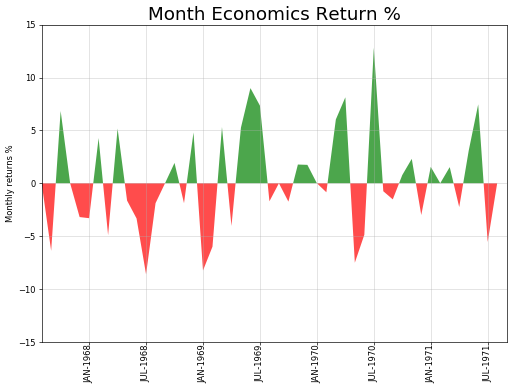

In [16]:
row_count = 50
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv", parse_dates=['date']).head(row_count)
x = np.arange(df.shape[0])
y_returns = (df.psavert.diff().fillna(0)/df.psavert.shift(1)).fillna(0) * 100

# Plot
plt.figure(figsize=(10,7), dpi= 60)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] < 0, facecolor='red', interpolate=True, alpha=0.7)

# Decorations
xtickvals = [str(m)[:3].upper()+"-"+str(y) for y,m in zip(df.date.dt.year, df.date.dt.month_name())]
plt.gca().set_xticks(x[::6])
plt.gca().set_xticklabels(xtickvals[::6], rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})
plt.ylim(-15,15)
plt.xlim(1,row_count)
plt.title("Month Economics Return %", fontsize=22)
plt.ylabel('Monthly returns %')
plt.grid(alpha=0.5)
plt.show()

# Ranking

## Ordered Bar

In [1]:
# above data is being taken
doc = sat_data.sort_values("Average Score (SAT Math)")
sns.barplot(x="Average Score (SAT Math)", y="School Name", data=doc)
plt.show()

NameError: name 'sat_data' is not defined

## Ordered Column

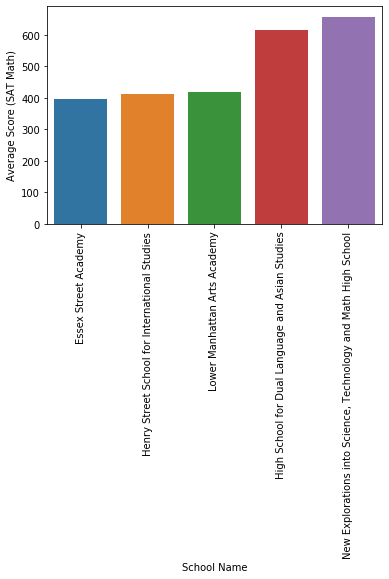

In [18]:

d = sns.barplot(y="Average Score (SAT Math)", x="School Name", data=doc)
plt.xticks(rotation=90)
plt.show()

## Ordered proportional symbol

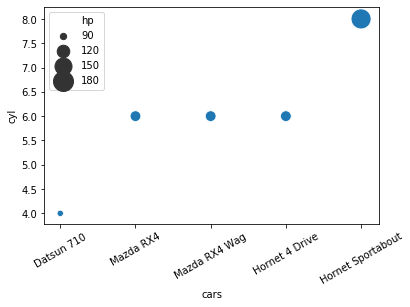

In [19]:
d2 = df1[:5]
d2 = d2.sort_values("hp")
sns.scatterplot(x="cars", size="hp", y="cyl", data=d2, sizes=(40, 400))
plt.xticks(rotation=30)
plt.show()

## Dot strip plot

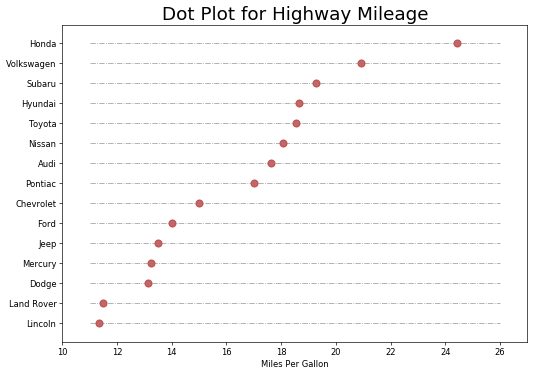

In [20]:
# Prepare Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(10,7), dpi= 60)
ax.hlines(y=df.index, xmin=11, xmax=26, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=df.index, x=df.cty, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Dot Plot for Highway Mileage', fontdict={'size':22})
ax.set_xlabel('Miles Per Gallon')
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={'horizontalalignment': 'right'})
ax.set_xlim(10, 27)
plt.show()

## Slope

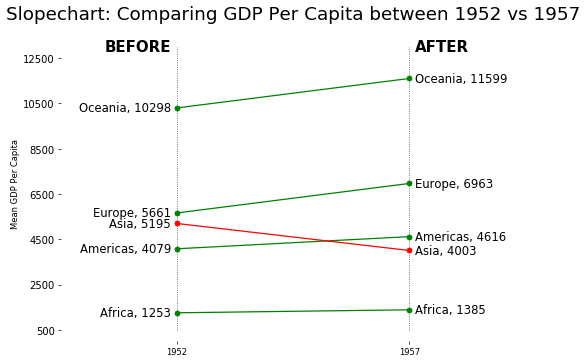

In [21]:
import matplotlib.lines as mlines
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/gdppercap.csv")

left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1952'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1957'])]
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(df['1952'], df['1957'])]

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(10,7), dpi= 60)

# Vertical Lines
ax.vlines(x=1, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['1952'], x=np.repeat(1, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['1957'], x=np.repeat(3, df.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
for p1, p2, c in zip(df['1952'], df['1957'], df['continent']):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
    ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':14})

# 'Before' and 'After' Annotations
ax.text(1-0.05, 13000, 'BEFORE', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.text(3+0.05, 13000, 'AFTER', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})

# Decoration
ax.set_title("Slopechart: Comparing GDP Per Capita between 1952 vs 1957", fontdict={'size':22})
ax.set(xlim=(0,4), ylim=(0,14000), ylabel='Mean GDP Per Capita')
ax.set_xticks([1,3])
ax.set_xticklabels(["1952", "1957"])
plt.yticks(np.arange(500, 13000, 2000), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

## Lollipop chart

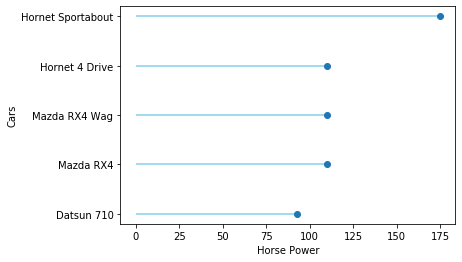

In [22]:
plt.hlines(y=d2.cars, xmin=0, xmax=d2.hp, color="skyblue")
plt.plot(d2.hp, d2.cars, "o")
plt.xlabel("Horse Power")
plt.ylabel("Cars")
plt.show()

# Distribution

## Histogram

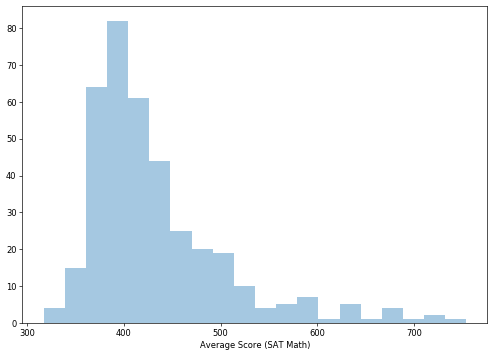

In [23]:
plt.figure(figsize=(10,7), dpi= 60)
sns.distplot(o_sat_data["Average Score (SAT Math)"], bins=20, kde=False)

## BoxPlot

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

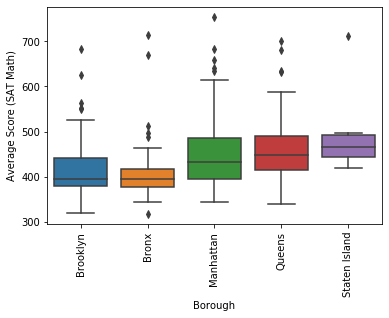

In [24]:
box_data = o_sat_data.sort_values("Student Enrollment")
sns.boxplot(x="Borough", y="Average Score (SAT Math)", data=box_data)
plt.xticks(rotation=90)

## Violin Plot

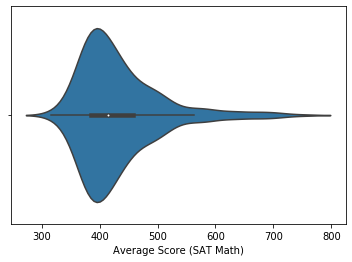

In [25]:
sns.violinplot(x=o_sat_data["Average Score (SAT Math)"])

## Population Pyramid

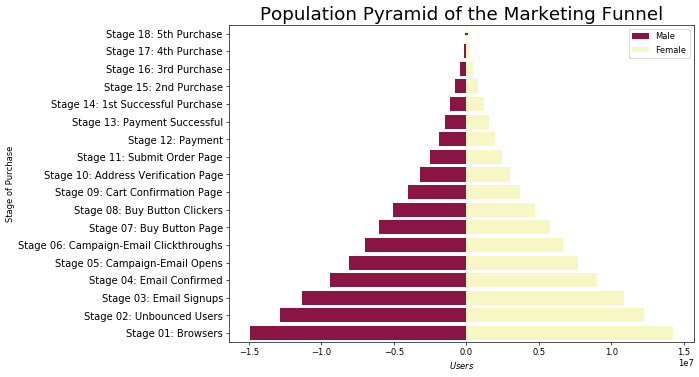

In [26]:
# Read data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/email_campaign_funnel.csv")

# Draw Plot
plt.figure(figsize=(10,7), dpi= 60)
group_col = 'Gender'
# getting the stages of the user in reverse order
order_of_bars = df.Stage.unique()[::-1]

# it is to change the color according to male or femal with numbers
colors = [plt.cm.Spectral(i/float(len(df[group_col].unique()))) for i in range(len(df[group_col].unique()))]

for c, group in zip(colors, df[group_col].unique()):
    sns.barplot(x='Users', y='Stage', data=df.loc[df[group_col]==group, :], order=order_of_bars, color=c, label=group)

# Decorations    
plt.xlabel("$Users$")
plt.ylabel("Stage of Purchase")
plt.yticks(fontsize=12)
plt.title("Population Pyramid of the Marketing Funnel", fontsize=22)
plt.legend()
plt.show()

## Dot Plot

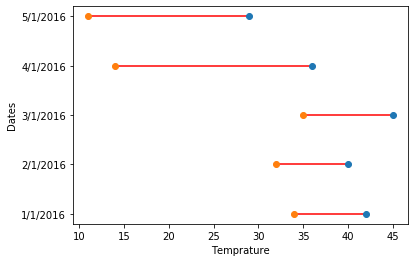

In [27]:
dpd = Wdf[:5]
plt.hlines(y=dpd.date, xmin=dpd["minimum_temperature"], xmax=dpd["maximum_temperature"], color="red")
plt.plot(dpd["maximum_temperature"], dpd.date, "o")
plt.plot(dpd["minimum_temperature"], dpd.date, "o")
plt.ylabel("Dates")
plt.xlabel("Temprature")
plt.show()

## Cumulative curve

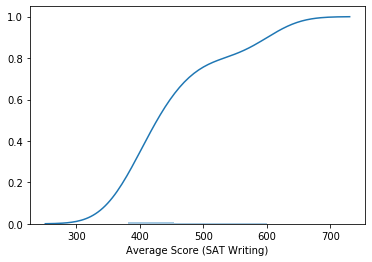

In [28]:
sns.distplot(sat_data["Average Score (SAT Writing)"], kde_kws={'cumulative': True})

#Change over Time

## Line

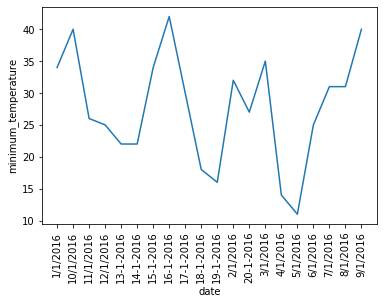

In [29]:
sns.lineplot(x="date", y="minimum_temperature", data=Wdf[:20])
plt.xticks(rotation=90)
plt.show()

## Column

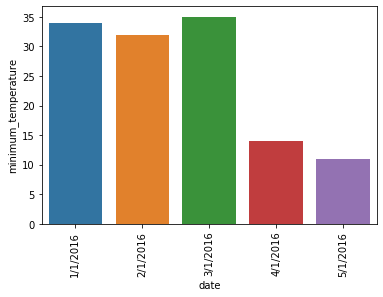

In [30]:
sns.barplot(x="date", y="minimum_temperature", data=dpd)
plt.xticks(rotation=90)
plt.show()

## Line + Column

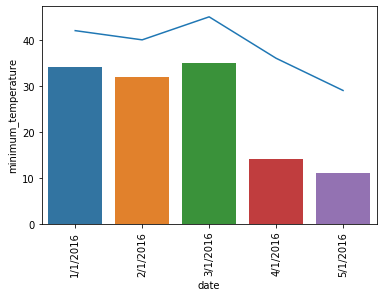

In [31]:
sns.lineplot(x="date", y="maximum_temperature", data=dpd)
sns.barplot(x="date", y="minimum_temperature", data=dpd)
plt.xticks(rotation=90)
plt.show()

## Stock Price

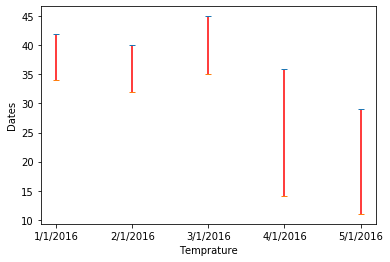

In [32]:
marker = "_"
plt.vlines(x=dpd.date, ymin=dpd["minimum_temperature"], ymax=dpd["maximum_temperature"], color="red")
plt.plot(dpd.date, dpd["maximum_temperature"], marker)
plt.plot(dpd.date, dpd["minimum_temperature"], marker)
plt.ylabel("Dates")
plt.xlabel("Temprature")
plt.show()

## Area Chart

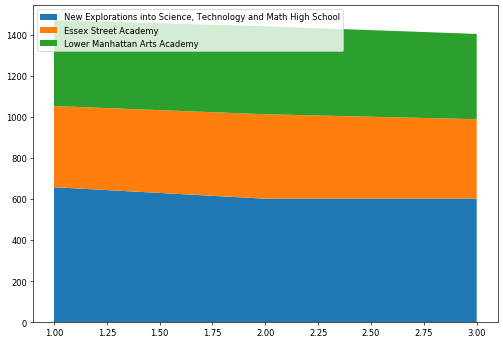

In [33]:
ac_sat_data = sat_data[:3]
o_scores = ac_sat_data[:][["Average Score (SAT Math)", "Average Score (SAT Reading)", "Average Score (SAT Writing)"]]
plt.figure(figsize=(10,7), dpi= 60)
plt.stackplot(range(1, 4), o_scores, labels=ac_sat_data["School Name"])
plt.legend(loc='upper left')
plt.show()


## Connected Scatterplot


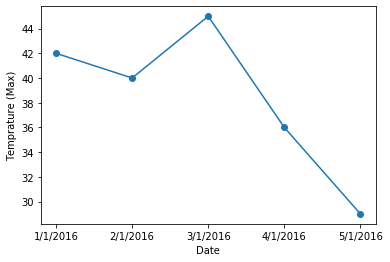

In [34]:
plt.plot("date", "maximum_temperature", data=dpd, linestyle="-", marker="o")
plt.xlabel("Date")
plt.ylabel("Temprature (Max)")
plt.show()

# Part-to-whole

## Pie

In [35]:
#loading data
tips_data = sns.load_dataset("tips")
tips_data.day.unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

In [36]:
sun_t = int(tips_data[tips_data["day"] == "Sun"]["tip"].sum())
sat_t = int(tips_data[tips_data["day"] == "Sat"]["tip"].sum())
thur_t = int(tips_data[tips_data["day"] == "Thur"]["tip"].sum())
fri_t = int(tips_data[tips_data["day"] == "Fri"]["tip"].sum())
t_c_data = pd.DataFrame([{"day": "Sun", "total": sun_t}, {"day": "Sat", "total": sat_t}, {"day": "Thur", "total": thur_t}, {"day": "Fri", "total": fri_t} ])
t_c_data

,day,total
0,Sun,247
1,Sat,260
2,Thur,171
3,Fri,51


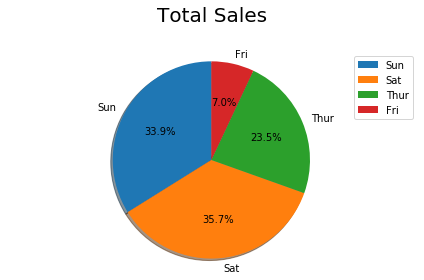

In [37]:
fig1, ax1 = plt.subplots()
ax1.pie(t_c_data["total"], labels=t_c_data["day"], autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.legend(t_c_data["day"])
plt.title("Total Sales", fontdict={"fontsize": 20.0}, pad=30.0)
plt.tight_layout()
plt.show()

## Donut Plot

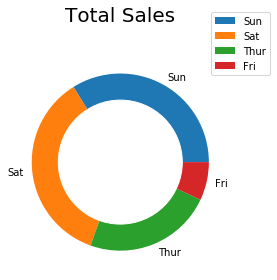

In [38]:
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(t_c_data["total"], labels=t_c_data["day"])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(t_c_data["day"], loc="upper right", bbox_to_anchor=(1.2, 1.2)) # bbox_to_anchor is to position the legend
plt.title("Total Sales", fontdict={"fontsize": 20.0}, pad=30.0)
plt.tight_layout()
plt.show()

## Treemap

In [39]:
!pip install squarify
import squarify 

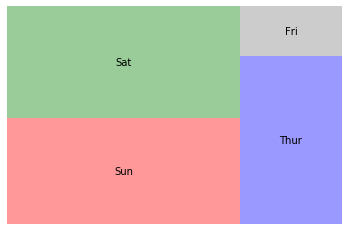

In [40]:
squarify.plot(t_c_data["total"], label=t_c_data["day"], alpha=.4, color=["red","green","blue", "grey"] )
plt.axis('off')
plt.show()

# Magnitude

## Column

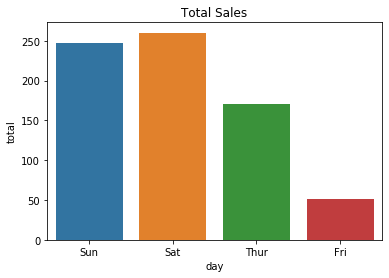

In [41]:
sns.barplot(x="day",y="total", data=t_c_data)
plt.title("Total Sales")
plt.show()

## Bar

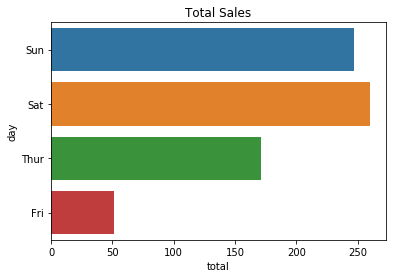

In [42]:
sns.barplot(x="total",y="day", data=t_c_data)
plt.title("Total Sales")
plt.show()

## Paired Column

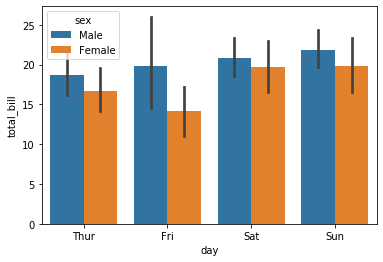

In [43]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips_data)
plt.show()

## Paired Bar

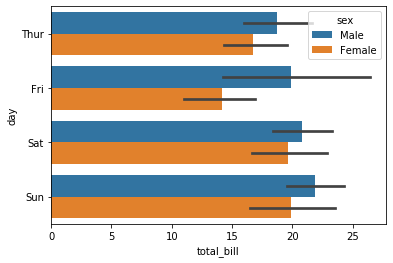

In [44]:
sns.barplot(x="total_bill", y="day", hue="sex", data=tips_data)
plt.show()

## Isotype Pictograph

In [45]:
!pip install pywaffle

     |████████████████████████████████| 532kB 2.7MB/s 


In [0]:
from pywaffle import Waffle

In [79]:
three_car_data = df1[2:5][["cyl", "cars"]]
three_car_data.head()
three_car_data['cars'].items()
["{0} ({1})".format(v["cyl"], v["cars"]) for n, v in three_car_data[['cyl','cars']].iterrows()]
# three_car_data["cyl"].values

['2 (cyl              4\ncars    Datsun 710\nName: 2, dtype: object)',
 '3 (cyl                  6\ncars    Hornet 4 Drive\nName: 3, dtype: object)',
 '4 (cyl                     8\ncars    Hornet Sportabout\nName: 4, dtype: object)']

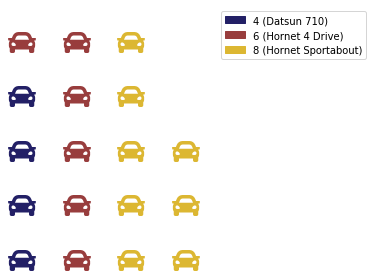

In [81]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=three_car_data["cyl"].values,
    labels=["{0} ({1})".format(v["cyl"], v["cars"]) for n, v in three_car_data[['cyl','cars']].iterrows()],
    icons='car',
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}, 
    colors=("#232066", "#983D3D", "#DCB732")
)

## Basic choropleth

In [82]:
import plotly.express as px

gapminder = px.data.gapminder().query("year==2007")
fig = px.choropleth(gapminder, locations="iso_alpha",
                    color="lifeExp", # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [90]:
!pip install basemap-1.0.8-cp34-none-win_amd64.whl

ERROR: basemap-1.0.8-cp34-none-win_amd64.whl is not a supported wheel on this platform.


## Radar Plot

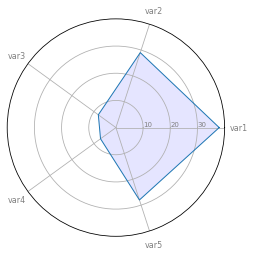

In [96]:

from math import pi

df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)
plt.show()

## Venn Diagram

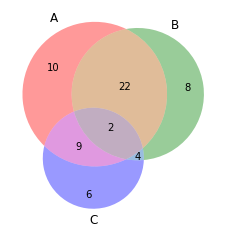

In [97]:
from matplotlib_venn import venn3
 
# Make the diagram
venn3(subsets = (10, 8, 22, 6,9,4,2))
plt.show()


## Waterfall plots

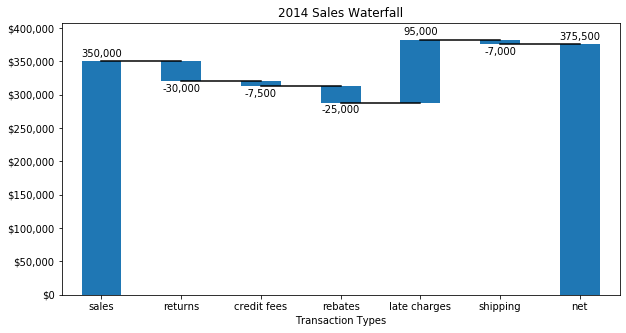

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

#Use python 2.7+ syntax to format currency
def money(x, pos):
    'The two args are the value and tick position'
    return "${:,.0f}".format(x)
formatter = FuncFormatter(money)

#Data to plot. Do not include a total, it will be calculated
index = ['sales','returns','credit fees','rebates','late charges','shipping']
data = {'amount': [350000,-30000,-7500,-25000,95000,-7000]}

#Store data and create a blank series to use for the waterfall
trans = pd.DataFrame(data=data,index=index)
blank = trans.amount.cumsum().shift(1).fillna(0)

#Get the net total number for the final element in the waterfall
total = trans.sum().amount
trans.loc["net"]= total
blank.loc["net"] = total

#The steps graphically show the levels as well as used for label placement
step = blank.reset_index(drop=True).repeat(3).shift(-1)
step[1::3] = np.nan

#When plotting the last element, we want to show the full bar,
#Set the blank to 0
blank.loc["net"] = 0

#Plot and label
my_plot = trans.plot(kind='bar', stacked=True, bottom=blank,legend=None, figsize=(10, 5), title="2014 Sales Waterfall")
my_plot.plot(step.index, step.values,'k')
my_plot.set_xlabel("Transaction Types")

#Format the axis for dollars
my_plot.yaxis.set_major_formatter(formatter)

#Get the y-axis position for the labels
y_height = trans.amount.cumsum().shift(1).fillna(0)

#Get an offset so labels don't sit right on top of the bar
max = trans.max()
neg_offset = max / 25
pos_offset = max / 50
plot_offset = int(max / 15)

#Start label loop
loop = 0
for index, row in trans.iterrows():
    # For the last item in the list, we don't want to double count
    if row['amount'] == total:
        y = y_height[loop]
    else:
        y = y_height[loop] + row['amount']
    # Determine if we want a neg or pos offset
    if row['amount'] > 0:
        y += pos_offset
    else:
        y -= neg_offset
    my_plot.annotate("{:,.0f}".format(row['amount']),(loop,y),ha="center")
    loop+=1

#Scale up the y axis so there is room for the labels
my_plot.set_ylim(0,blank.max()+int(plot_offset))
#Rotate the labels
my_plot.set_xticklabels(trans.index,rotation=0)
my_plot.get_figure().savefig("waterfall.png",dpi=200,bbox_inches='tight')

In [101]:
!pip install networkx

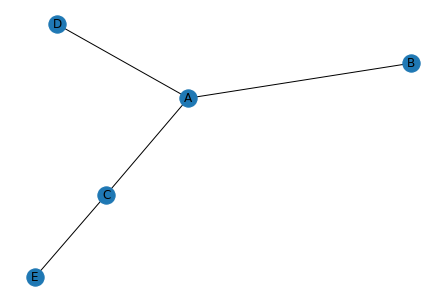

In [103]:
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with 4 connections
df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']})
df
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to')
 
# Plot it
nx.draw(G, with_labels=True)
plt.show()
